## Observations and Insights 

Observation 1: The data sample is fairly gender balanced
Observation 2: All drug regimens have similar sample sizes (# of timepoints)
Observation 3: Capomulin looks quite effective at reducing tumor volume in mice

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_dataset = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_dataset
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Checking the number of mice.
df = combined_dataset
len(df["Mouse ID"].value_counts())


249

In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_dataset = combined_dataset.drop_duplicates(subset=["Mouse ID", "Timepoint"],keep=False)
combined_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice in the clean DataFrame.
df = combined_dataset
len(df["Mouse ID"].value_counts())

249

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

gb = combined_dataset.groupby("Drug Regimen")
mean = gb.mean()["Tumor Volume (mm3)"]
median = gb.median()["Tumor Volume (mm3)"]
var = gb.var()["Tumor Volume (mm3)"]
std = gb.std()["Tumor Volume (mm3)"]
sem = gb.sem()["Tumor Volume (mm3)"]

summary_dataframe = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": var,
    "Standard Deviation": std,
    "SEM": sem
})

summary_dataframe

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

df = combined_dataset[["Tumor Volume (mm3)","Drug Regimen"]]
print(df.groupby("Drug Regimen").agg(["mean","median","var","std","sem"]))


             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoints'>

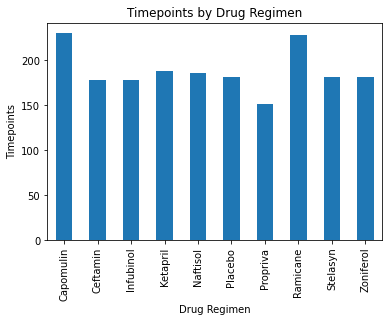

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df = combined_dataset
gb = df.groupby("Drug Regimen").size()
gb.plot.bar(ylabel = "Timepoints",title = "Timepoints by Drug Regimen")



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

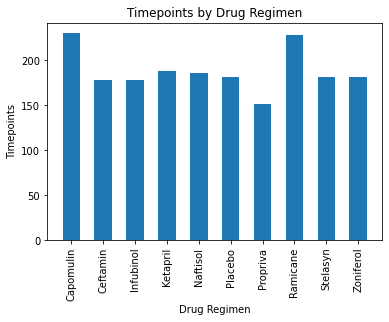

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
df = combined_dataset
gb = df.groupby("Drug Regimen").size()

x_values = gb.keys()
y_values = gb

plt.bar(x = range(10),height = gb,tick_label = x_values, width = .55)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Timepoints by Drug Regimen")
plt.xticks(rotation=90)


<AxesSubplot:>

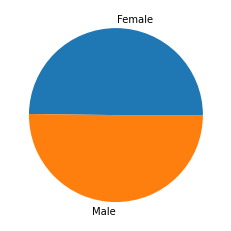

In [231]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df = combined_dataset[["Sex","Mouse ID"]]
gb = df.groupby("Sex")["Mouse ID"].nunique()

gb.plot.pie(ylabel="")
#gb.plot.bar(ylabel = "Timepoints",title = "Timepoints by Drug Regimen")

Text(0, 0.5, 'Mouse ID')

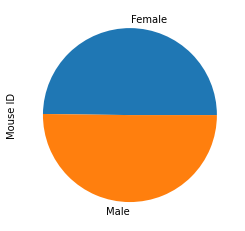

In [230]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df = combined_dataset[["Sex","Mouse ID"]]
gb = df.groupby("Sex")["Mouse ID"].nunique()
males = gb["Male"]
females = gb["Female"]

plt.pie(gb, labels=["Female","Male"])



## Quartiles, Outliers and Boxplots

In [185]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df = combined_dataset

df = df.loc[(df["Drug Regimen"] == "Capomulin") | (df["Drug Regimen"] == "Ramicane") | (df["Drug Regimen"] == "Infubinol")| (df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
gb = df.groupby("Mouse ID")
maxvalues = gb.agg("max")["Timepoint"]

maxDF = pd.DataFrame({
    "Max Timepoint": maxvalues
})
maxDF

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newdf = pd.merge(left=df,right=maxDF,how="left",on="Mouse ID")
newdf = newdf[newdf["Timepoint"] == newdf["Max Timepoint"]]
newdf


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
773,x822,Ceftamin,Male,3,29,45,61.386660,3,45
783,y163,Infubinol,Female,17,27,45,67.685569,3,45
793,y769,Ceftamin,Female,6,27,45,68.594745,4,45
803,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [228]:
# Put treatments into a list for for loop (and later for plot labels)
df = newdf
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

voldata = df["Tumor Volume (mm3)"]
#voldata = df[["Tumor Volume (mm3)","Drug Regimen"]]
#gb = voldata.groupby("Drug Regimen")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
bottomquartile = voldata.quantile(.25)
median = voldata.quantile(.5)
topquartile = voldata.quantile(.75)

iqr = topquartile - bottomquartile
outliers = df[(df["Tumor Volume (mm3)"] > topquartile) | (df["Tumor Volume (mm3)"] < bottomquartile)]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes


plt.boxplot(voldata)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Tumor Volume (mm3),Drug Regimen
9,22.050126,Ramicane
19,23.343598,Capomulin
29,28.484033,Capomulin
39,28.430964,Capomulin
49,29.128472,Ramicane
59,30.276232,Ramicane
64,30.485985,Capomulin
74,30.564625,Ramicane
84,30.638696,Ramicane
104,31.023923,Capomulin


{'whiskers': [<matplotlib.lines.Line2D at 0x1dc0dfbd640>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc0dfbdd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc0dfbd2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc0dfaa400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc0dfaa760>],
 'means': []}

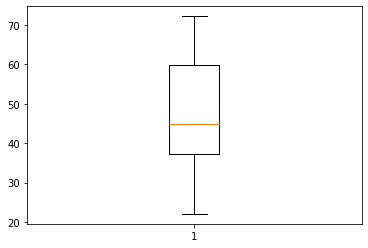

In [179]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(voldata)

## Line and Scatter Plots

<AxesSubplot:title={'center':'Tumor Volume over time for Mouse s185'}, xlabel='Timepoint', ylabel='Tumor Volume'>

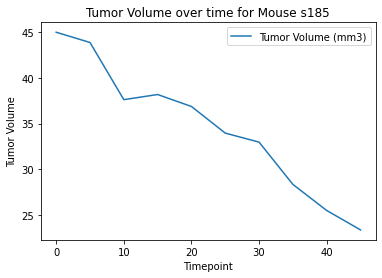

In [220]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df = combined_dataset
mymouse = df[df["Mouse ID"] == "s185"]

mymouse.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)",ylabel="Tumor Volume",title="Tumor Volume over time for Mouse s185")


<AxesSubplot:title={'center':'Tumor Volume Over Time with Capomulin'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

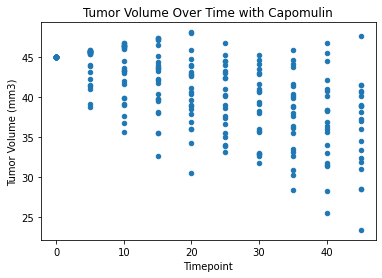

In [215]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df = combined_dataset
capomulinDF = df[df["Drug Regimen"] == "Capomulin"]
capomulinDF.plot(kind="scatter",x="Timepoint",y="Tumor Volume (mm3)",title="Tumor Volume Over Time with Capomulin")

## Correlation and Regression

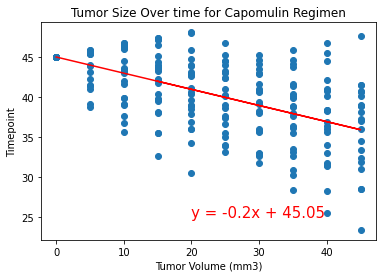

In [214]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
df = capomulinDF
x_values = df["Timepoint"]
y_values = df["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.title("Tumor Size Over time for Capomulin Regimen")
plt.show()